<a href="https://colab.research.google.com/github/OtterAlexandra/-/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22HSE_Linalg_Lab_Fall_2024_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Линейная алгебра. Лабораторная работа 1, осень 2024



В этой лабораторной работе вы познакомитесь со средой Jupyter Notebook и библиотеками numpy и scipy.

## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy` – основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` – графическая библиотека

Подключить их можно следующим образом:

In [2]:
# Запустите этот код
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

Теперь вы можете позвать, скажем, функцию `scipy.linalg.det()` с помощью кода `sla.det()`, а функцию `numpy.exp()` – с помощью кода `np.exp()`.

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных, – это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [ ]:
# Запустите этот код
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape) # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://docs.scipy.org/doc/numpy-1.10.1/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать (вообще данная процедура называется slicing):
- элемент с номером `(i,j)`: `A[i,j]`
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]` и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по k-ю: `A[i:k,:]`

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов из списка `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`

*Умножение матриц* производится с помощью функции `np.dot()` либо оператора `@`. Есть три варианта написания: `A.dot(B)`, `np.dot(A, B)` и `A @ B`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` – это матрица, элементами которой являются произведения $A_{ij}B_{ij}$. Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` – это матрица, элементами которой являются экспоненты элементов матрицы `A`.

Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`.

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` – это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)`.

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы стандартного курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило, оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**Где искать помощь**

Библиотеки `numpy` и `scipy` снабжены прекрасной документацией. Если у вас возникают вопросы о том, как работает та или иная функция (или даже как называется функция, выполняющая то, что вам нужно), вы почти всегда можете найти там ответы.

[Ссылка на документацию пакета scipy.linalg](https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html)

Если у вас возникает какая-то ошибка и вы не можете понять, что вы делаете не так, то

1) в первую очередь попробуйте просто загуглить текст ошибки, наверняка в интернете кто-то уже сталкивался с такой ситуацией;  
2) поспрашивайте своих одногруппников, не было ли у них такой ошибки, и если была, то как они справлялись;  
3) попросите помощи у вашего учебного ассистента.




**И всё-таки задание**

**Задание 1.1 [0.2 балла за каждый пункт]** В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

- создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

- найдите её след (не силою мысли, а с помощью библиотечных функций, конечно);

- найдите обратную к ней матрицу;

- сгенерируйте случайную матрицу $X$ размера $4\times5$;

- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2-й и 3-й строк и 1-го и 2-го столбцов; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

- найдите произведение $X^TX$.

Пожалуйста, каждый пункт делайте в новом блоке и не забывайте распечатывать результаты.

In [58]:
Z = np.zeros(shape=(3, 4))
print(Z)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [59]:
A = np.diag([1, 2, 3, 4, 5])
print(A)

[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]


In [60]:
trace = np.trace(A)
print(trace)

15


In [65]:
A_1 = sla.inv(A)
print(A_1)

[[ 1.          0.         -0.          0.         -0.        ]
 [ 0.          0.5        -0.          0.         -0.        ]
 [ 0.          0.          0.33333333  0.         -0.        ]
 [ 0.          0.          0.          0.25       -0.        ]
 [ 0.          0.          0.          0.          0.2       ]]


In [62]:
X = np.random.rand(4, 5)
print(X)

[[0.5285896  0.16269889 0.15465825 0.49991034 0.39148537]
 [0.78334073 0.12356765 0.27232787 0.07560691 0.44214635]
 [0.98474553 0.0199931  0.20766414 0.78896662 0.04240203]
 [0.92661447 0.69817136 0.91745246 0.52406713 0.12936107]]


In [63]:
P = np.linalg.det(X[1:3, 0:2])
print(P)

-0.1060212893723623


In [64]:
comp = X.T @ X
print(comp)


[[2.72136781 0.84942031 1.34969731 1.58601291 0.71490939]
 [0.84942031 0.52958286 0.70350451 0.47233997 0.20949316]
 [1.34969731 0.70350451 0.98292505 0.74255188 0.30844322]
 [1.58601291 0.47233997 0.74255188 1.15274143 0.33038457]
 [0.71490939 0.20949316 0.30844322 0.33038457 0.36728641]]


## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете.

**Задание 2.1 [1 балл]**
Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [66]:
def my_det(a):
    det = 1
    shape = a.shape
    X = a.copy().astype(np.float128)

    if shape[-1] != shape[-2]:
      raise ValueError('Ну попытка хорошая, но не получится')

    for i in range(shape[0] - 1):
        new_i = i

        if X[i][i] == 0:
            while X[new_i][i] == 0 and new_i < shape[0] - 1:
                new_i += 1

        if new_i != i:
            det *= -1
        if new_i == shape[0] - 1 and X[new_i][i] == 0:
            return 0

        times = X[i].copy()
        X[i] = X[new_i].copy()
        X[new_i] = times.copy()

        for j in range(i + 1, shape[0]):
            k = X[j][i] / X[i][i]
            X[j] = X[j] - k * X[i]

    det *= np.prod(np.diag(X))
    return det

Простая проверка:

In [73]:
# Запустите этот блок кода
X = np.array([[0,0,1], [0,1,0], [1,0,0]])
print(my_det(X))
print(sla.det(X))

-1.0
-1.0


На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $50\times50$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [68]:
# Запустите этот блок кода
for _ in range(50):
    X = np.random.rand(50, 50)
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        print('FAILED')

Если вы ни разу не получили `FAILED`, то ваша функция работает правильно.

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

17.7 µs ± 1.39 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
324 µs ± 59.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
104 µs ± 403 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
25.8 ms ± 7.55 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
41.4 ms ± 13.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
5.7 s ± 512 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


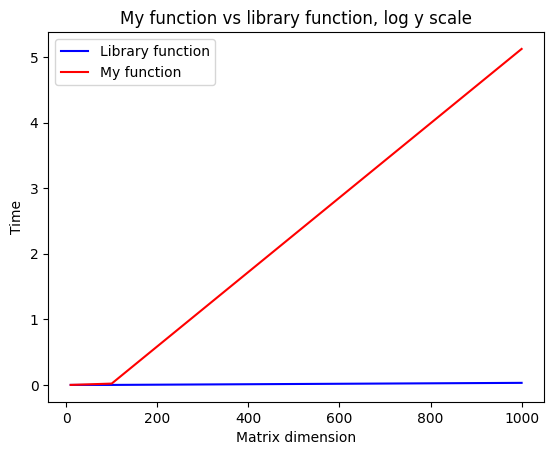

In [69]:
# Запустите этот блок кода
lib_times = []
my_times = []
dimensions = [10, 100, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

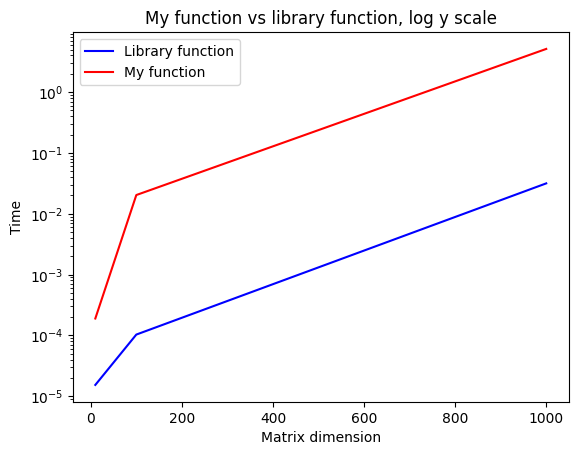

In [70]:
# Запустите этот блок кода
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью.

**Задание 3.1 [0.6 балла]** В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [74]:
a = np.array([[1, 0], [10**20, 1]])
b = np.array([[10**-20, 1], [0, 1 - 10**20]])

a1 = a.copy().astype(float)
b1 = b.copy().astype(float)

print(np.dot(a, b))
print(np.dot(a1, b1))

[[1e-20 1]
 [1.0 1]]
[[1.e-20 1.e+00]
 [1.e+00 0.e+00]]


И какой из них правильный?

Правильный ответ в первом перемножении, т.к. элемент с индексами (2, 2) считается по формуле:

$С_{22}$ = $10^{20}$ * 1 + 1 * (1 - $10^{20}$) = $10^{20}$ + 1 - $10^{20}$ = 1

Такой ответ мы видим при первом способе перемножения ♡


---

**Задание 3.2 [0.75 балла]** Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [47]:
def my_pascal(dim):
    P = np.zeros((dim, dim))

    P[0] = [1] * dim
    P = P.T
    P[0] = [1] * dim
    for i in range(1, dim):
        for j in range(1, dim):
            P[i][j] = P[i - 1][j] + P[i][j - 1]

    return P


print(my_pascal(7))

[[  1.   1.   1.   1.   1.   1.   1.]
 [  1.   2.   3.   4.   5.   6.   7.]
 [  1.   3.   6.  10.  15.  21.  28.]
 [  1.   4.  10.  20.  35.  56.  84.]
 [  1.   5.  15.  35.  70. 126. 210.]
 [  1.   6.  21.  56. 126. 252. 462.]
 [  1.   7.  28.  84. 210. 462. 924.]]


:Чему равен её определитель? **Строго** поясните свой ответ.

Внимательно посмотрим на формулу создания матрицы Паскаля. Нетрудно заметить что если вычесть из строки i строку i-1, то мы получим её же, но сдвинутую вправо на 1 элемент.
Покажем на примере:
\begin{pmatrix}
...&...&...&...&... \\
1 & a_1 & a_2 & a_3 & ... \\
1 & a_1+1 & a_1+a_2+1 & a_1+a_2+a_3+1 & ...\\
1 & a_1+2 & 2a_1+a_2+3 & 3a_1+2a_2+a_3+4 & ... \\
...&...&...&...&...
\end{pmatrix}
Вычтем из каждой строчки верхнюю, кроме первой написанной
\begin{pmatrix}
...&...&...&...&... \\
1 & a_1 & a_2 & a_3 & ... \\
0 & 1 & a_1+1 & a_1+a_2+1 & ...\\
0 & 1 & a_1+2 & 2a_1+a_2+3 & ... \\
...&...&...&...&...
\end{pmatrix}
Итак, мы получили сдвиг. Это можно показать формульно $C_n^m$ = $C_{n-1}^{m-1}$ + $C_{n-1}^m$, в нашей матрице $C_n^m$ = $P_{n, m}$, $C_{n-1}^{m-1}$ = $P_{n, m-1}$, $C_{n-1}^m$ = $P_{n-1, m}$. После вычетания верхней строчки $P_{n, m}$ = $P_{n, m-1}$ что и обозначает сдвиг вправо.

Проделаем эти операции по алгоритму:

1) Вычтем из всех строк, начиная со второй, верхнюю. Мы обнулим все элементы под $P_{11}$

2)Вычтем из всех строк, начиная с третьей, вернюю. Мы обнулим все элементы под
под $P_{22}$

...

n-1) Вычтем из строки n строку n-1

Данный алгорим привел нашу матрицу к верхнетреугольному виду, где на диагонали стоят 1. Таким образом, детерминант матрицы Паскаля всегда равен 1. ♡

----

А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [48]:
print(sla.det(my_pascal(30)))

-3.400444993542751e+51


Разница заметна невооружённым взглядом!

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов (и самописных вычислений в целом) в Питоне лучше по возможности избегать, и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично, если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

**Задание 4.1 [0.75 балла]** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение диагональных элементов, а также сумму квадратов диагональных элементов квадратной матрицы `A`.

In [53]:
import math

def prod_and_sq_sum(A):
    diagonal_a = A.diagonal()
    n = len(diagonal_a)
    P = np.diag(diagonal_a)
    summ_sq = diagonal_a.reshape(1, n) @ diagonal_a
    return float(sla.det(P)), float(summ_sq[0])


# проверка
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
b = a.diagonal()

print(math.prod(b), sum([x**2 for x in b]))
print(prod_and_sq_sum(a))

45 107
(45.0, 107.0)


**Задание 4.2 [0.75 балла]** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы; пусть также $\lambda_1, \ldots, \lambda_n$ – некоторые числа. Напишите функцию `f(A, B, lmbd, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,n)}\lambda_ia_ib_i^T$$

In [54]:
def f(a, b, lmbd, k):
    size = min(k, a.shape[1])
    lmbd = np.array(lmbd)
    a1 = a * lmbd.reshape((1, a.shape[0]))
    A_columns = a1[:,0:size]
    B_columns = b[:,0:size]
    prod_columns = np.dot(A_columns,B_columns.T)
    return prod_columns


# проверка
a = np.array([[1, 5], [1, 6]])
b = np.array([[1, 1], [1, 1]])

print(f(a, b, [2, 2], 1))
print(f(a, b, [2, 2], 2))
print(f(a, b, [2, 2], 3))

[[2 2]
 [2 2]]
[[12 12]
 [14 14]]
[[12 12]
 [14 14]]


**Задание 4.3 [0.75 балла]** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком.

In [55]:
def get_diag(A, B):
    res = (A * B.T).sum(axis=1)
    return res


# проверка
a = np.array([[1, 2], [5, 6]])
b = np.array([[7, 9], [11, 13]])

print(np.diag(a @ b))
print(get_diag(a, b))


[ 29 123]
[ 29 123]


## Часть 5. Комплексные числа и геометрия

У вас уже была возможность убедиться, что многие операции над комплексными числами имеют наглядную геометрическую интерпретацию. В этом задании вам будет предложено этим воспользоваться.

В Python число $i$ (мнимая единица) обозначено через `1j`. Так, число $0,5 + 1,2i$ будет иметь вид `0.5 + 1.2 * 1j`.

При выполнении задания вы должны работать с точками плоскости как с комплексными числами. Любые преобразования должны быть реализованы с помощью операций над комплексными числами: сложения, вычитания, умножения, деления, возведения в степень и комплексного сопряжения.

**Задание 5.1 [0.5 баллов]** Напишите функцию `shrink_rotate`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$,
- действительный коэффициент `coef`,
- угол `alpha`, заданный в радианах

и осуществляет следующее преобразование: мы берём вектор $AX$, умножаем его на `coef`, поворачиваем вокруг точки $A$ на угол `alpha` против часовой стрелки, после чего возвращаем конец полученного вектора. Ниже (левая картинка) мы приводим иллюстрацию действия этого преобразования:

<img src="ShrinkRotate.png">

**Задание 5.2 [0.5 баллов]** Напишите функцию `shrink_rotate_conj`, которая сначала делает то же самое, что и `shrink_rotate`, а после этого отражает вектор $AY$ относительно горизонтальной прямой, проходящей через точку $A$, и возвращает точку $Y'$ (см. правую часть рисунка).

**Задание 5.3 [0.5 баллов]** Напишите функцию `geometric_inverse`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$,
- положительное действительное число $r$

и осуществляет инверсию точки $X$ относительно окружности с центром $A$ радиуса $r$. [Определение инверсии вы можете посмотреть здесь](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_(%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%8F)).

In [56]:
import cmath


def shrink_rotate(x, a, coef=1., alpha=0.):
    v = x - a
    coef_v = v * coef
    moved_v = coef_v * cmath.exp(1j * alpha)

    res = a + moved_v
    return res


def shrink_rotate_conj(x, a, coef=1., alpha=0.):
    v = shrink_rotate(x, a, coef, alpha)
    reflected_v = a + (v - a).conjugate()  # спасибо сайтам с документацией для дурачков

    return reflected_v

def geometric_inverse(x, a, r):
    c = (r/ abs(x - a)) ** 2
    res = (x - a) * c
    return res + a


d1 = 2 + 1j
d2 = 0 + 1j
coef = 1
print(shrink_rotate(d1, d2, coef, alpha=cmath.pi / 4))
print(shrink_rotate_conj(d1, d2, coef, alpha=cmath.pi / 4))
print(abs(geometric_inverse(d1, d2, 4)) * abs(d1 - d2))

(1.4142135623730951+2.414213562373095j)
(1.4142135623730951-0.4142135623730949j)
16.1245154965971


**Задание 5.4 [0.75 баллов]** Рассмотрим следующий процесс:

```
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
```

Запустите его и нарисуйте множество точек, получающихся на итерациях начиняя с десятой.

*Указание*. Представьте квадрат $[-1,1]\times[-1,1]$ матрицей пикселей 1000x1000. Сначала все элементы матрицы положим нулями, а на каждой итерации начиная с десятой будем присваивать единицу соответствующему пикселю этой матрицы. То, что получилось, можно нарисовать с помощью функции `plt.imshow(..., cmap='gray')`. Картинку лучше сделать побольше, предварив `imshow` вызовом `plt.figure(figsize=(20, 20))`.

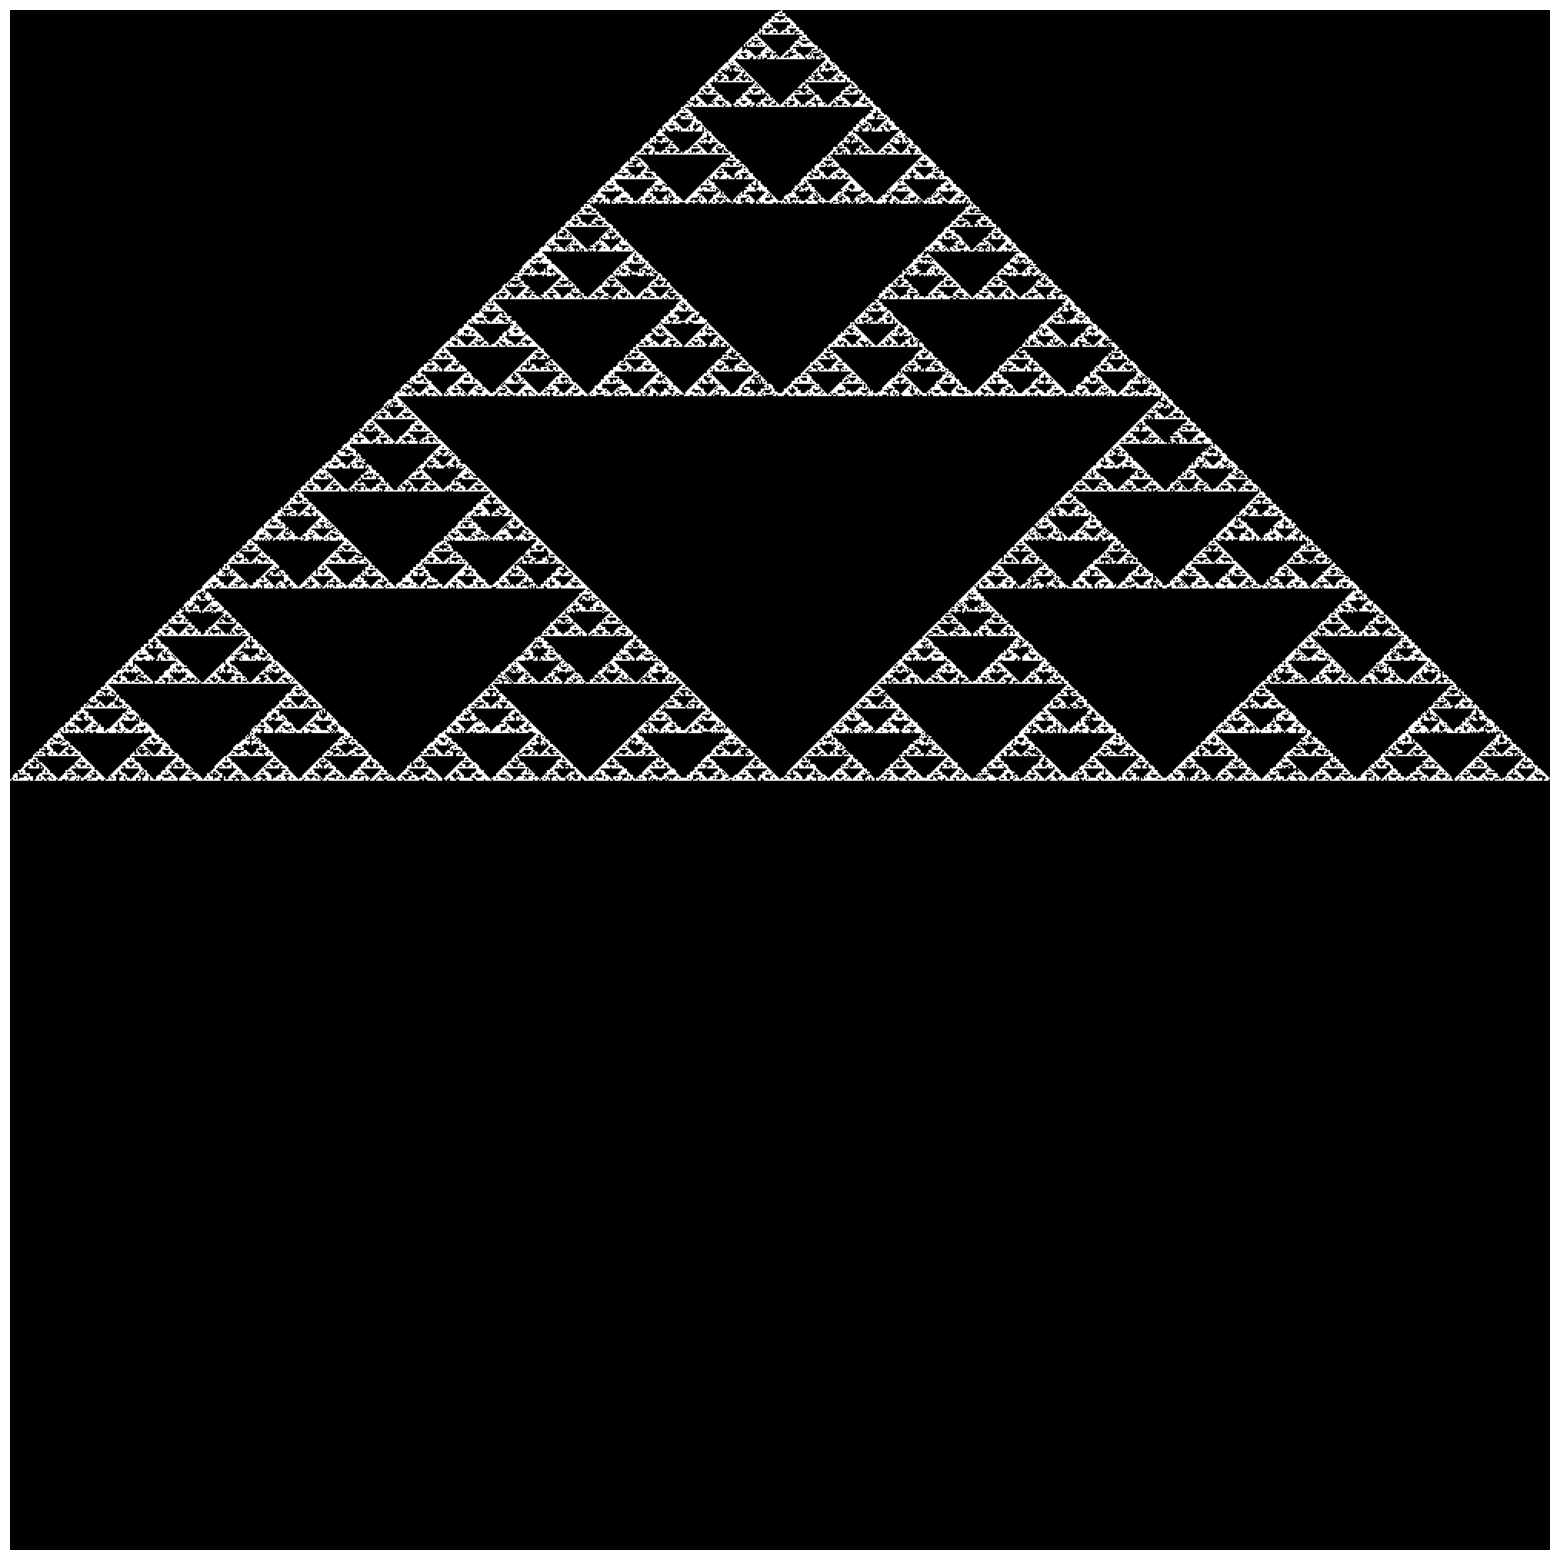

In [16]:
import numpy as np
import matplotlib.pyplot as plt


def shrink_rotate(x, a, coef=1., angle=0.):
    v = x - a
    coef_v = v * coef
    moved_v = coef_v * cmath.exp(1j * angle)

    res = a + moved_v
    return res


z = 0.5 + 0. * 1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1. * 1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0. * 1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0. * 1j, coef=0.5, angle=0.))
]

n = 1001
matrix = np.zeros((n, n), dtype=int)


def from_point_to_index(x, y):
    x1 = int((x + 1) / 2 * n)
    y1 = int((y + 1) / 2 * n)

    return x1, y1


for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)

    if n_iter >= 10:
        x, y = z.real, z.imag
        a, b = from_point_to_index(x, y)

        if 0 <= a < n and 0 <= b < n:
            matrix[b, a] = 1

plt.figure(figsize=(20, 20))
plt.imshow(matrix, cmap='gray', origin='lower')
plt.axis('off')  # чтобы цифры не мешали
plt.show()


**Задание 5.5 [0.75 баллов]** Попробуйте объяснить, почему получается именно эта фигура.

Посмотрим на функцию, которая задается через массив из 3-х кортежей с lambda функциями. В каждой из частей мы фиксируем точку, в данном случае (0, 1i), (1, 0) и (-1, 0) - это вершины треугольника. Далее функция работает так: выбираем точку t, отмечаем  ее, отмечаем середину отрезка от t до каждый из вершин треугольника, далее проделывают тот же алгоритм, но для новой точки. Из-за того, что мы выбираем точки случайно, у нас не простраиваются просто прямые от первоначальной точки до одной из вершин, точки прыгают.

Так же, если уменьшить их количество, рисунок станет менее четким и наоборот. Здесь большую роль играет вероятность и количество иттераций.

**Задание 5.6 [0.5 баллов]** Поэкспериментируйте с другими преобразованиями. Попробуйте найти какой-нибудь другой красиво выглядящий фрактал.

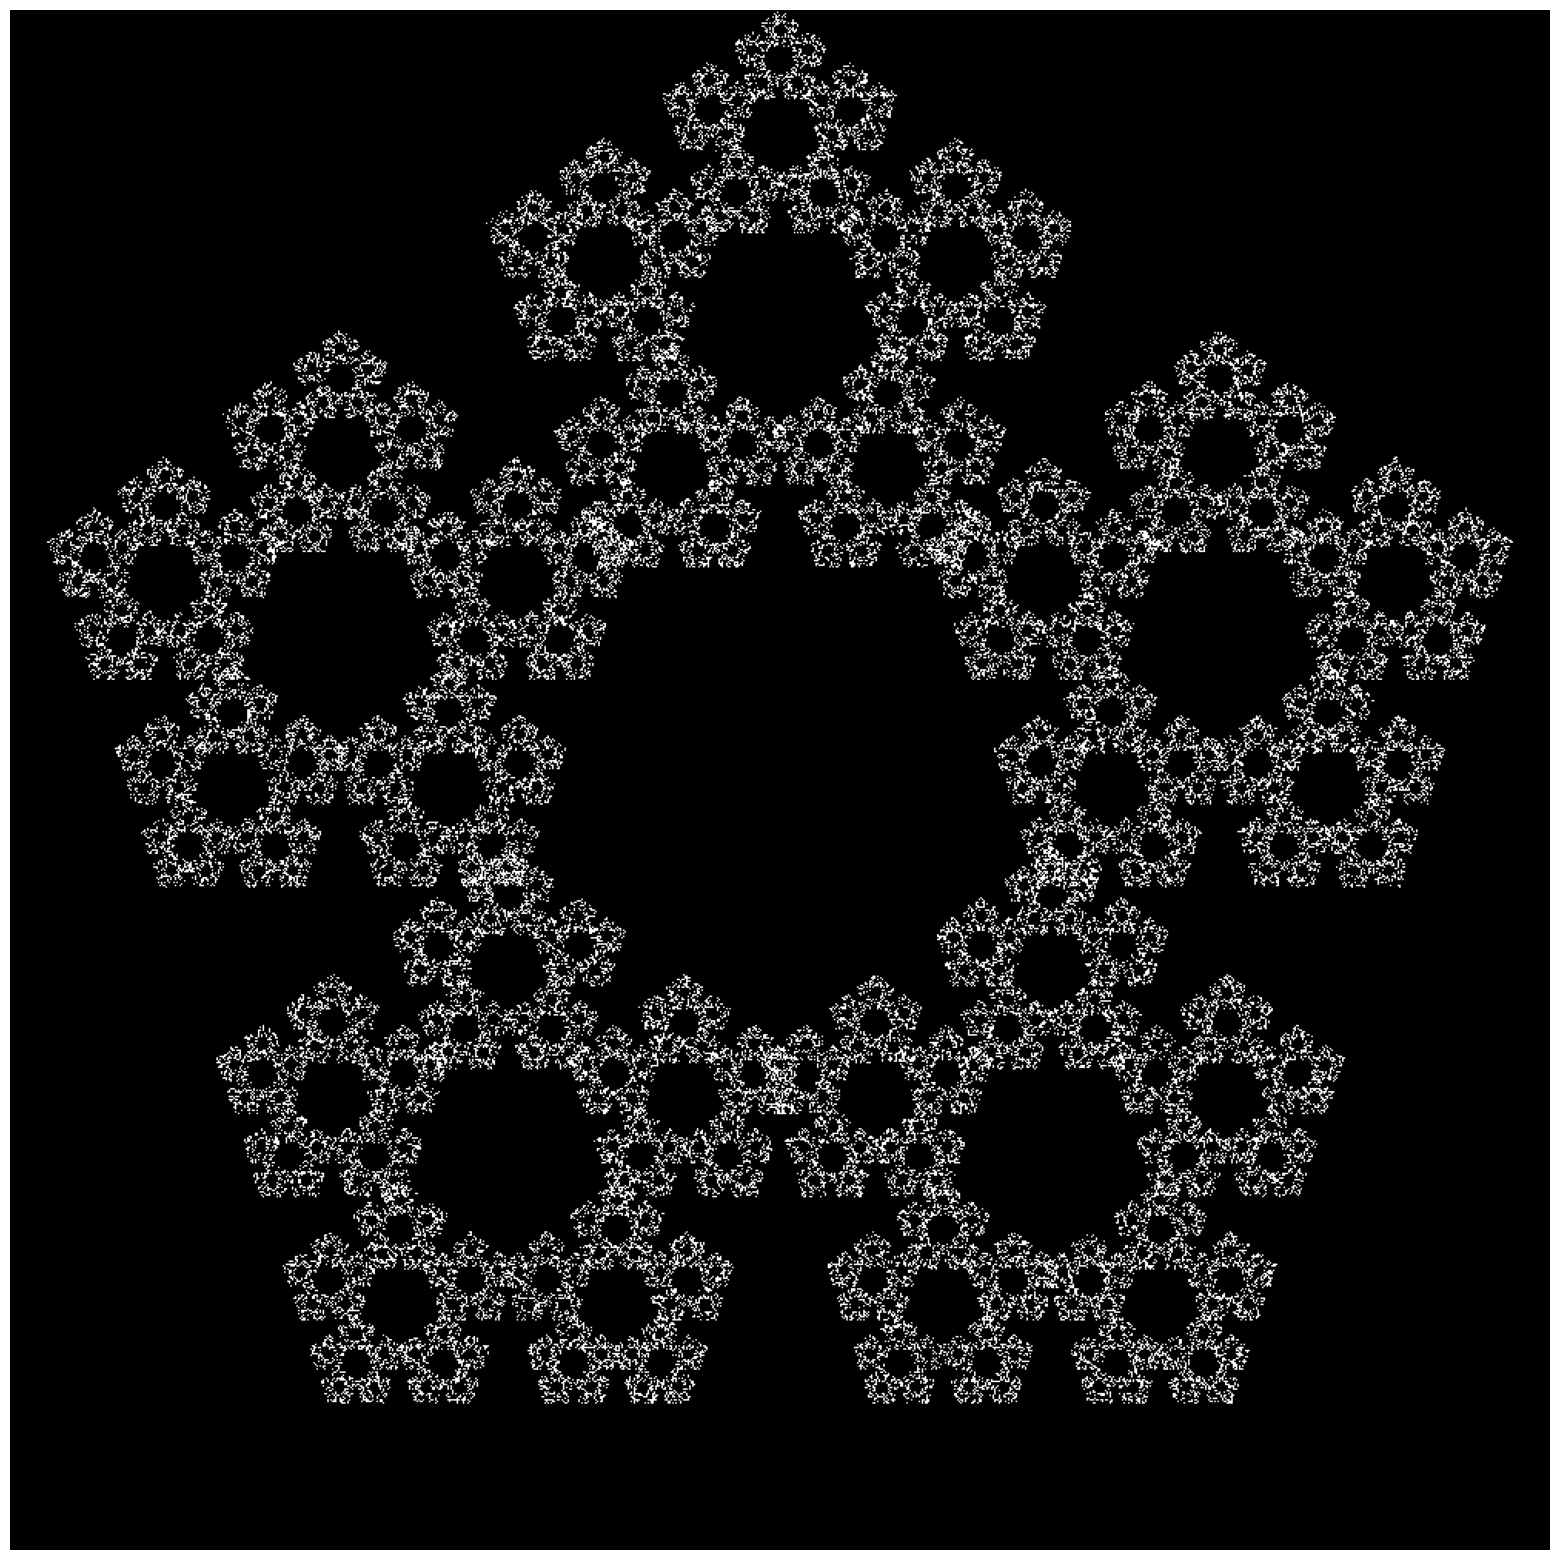

In [52]:
import cmath
import numpy as np
import matplotlib.pyplot as plt


def shrink_rotate(x, a, coef=1., angle=0.):
    v = x - a
    coef_v = v * coef
    moved_v = coef_v * cmath.exp(1j * angle)

    res = a + moved_v
    return res


z = 0.5 + 0. * 1j
max_iter = 90000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1. * 1j, coef=0.4, angle=0.)),
    (lambda t: shrink_rotate(t, 0.9510565162951535 + 0.3090169943749474 * 1j, coef=0.4, angle=0.)),
    (lambda t: shrink_rotate(t, -0.9510565162951535 + 0.3090169943749474 * 1j, coef=0.4, angle=0.)),
    (lambda t: shrink_rotate(t, 0.5877852522924731 - 0.8090169943749475 * 1j, coef=0.4, angle=0.)),
    (lambda t: shrink_rotate(t, -0.5877852522924731 - 0.8090169943749475 * 1j, coef=0.4, angle=0.))
]

n = 1000
matrix = np.zeros((n, n), dtype=int)


def from_point_to_index(x, y):
    x1 = int((x + 1) / 2 * n)
    y1 = int((y + 1) / 2 * n)

    return x1, y1


for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)

    if n_iter >= 10:
        x, y = z.real, z.imag
        a, b = from_point_to_index(x, y)

        if 0 <= a < n and 0 <= b < n:
            matrix[b, a] = 1

plt.figure(figsize=(20, 20))
plt.imshow(matrix, cmap='gray', origin='lower')
plt.axis('off')  # чтобы цифры не мешали
plt.show()

## Часть 6 (бонус). Метод Гаусса или обратные матрицы?

**Задание 6.1 [1.5 балла]** Пусть нам дано матричное уравнение $Ax = B$, где $A$ – матрица размера $n\times n$, а $B$ – матрица размера $n\times m$ (отметим, что это уравнение можно интерпретировать как $m$ систем с векторными правыми частями и однаковыми левыми). Вообще говоря, методов решения таких уравнений очень много, но мы пока рассмотрим два из них, с которыми вы уже хорошо знакомы.
1. Метод Гаусса;
2. Умножение на обратную матрицу: $x = A^{-1}B$.

В этом задании вы попробуете ответить на вопрос о том, какой из этих методов эффективнее. Проведите два эксперимента:
- сравните скорости решения системы при фиксированном `m = 10` и `n`, изменяющемся в пределах от 10 до 1000, например, для `n=10, 50, 100, 200, 500, 1000` (рост числа неизвестных при фиксированном количестве правых частей);
- сравните скорости решения системы при фиксированном `n = 100` и `m`, меняющемся от 10 до 10000, например, для `m = 10, 100, 500, 1000, 2000, 5000, 10000` (рост числа правых частей при фиксированном числе неизвестных).

При проведении экспериментов не возбраняется использовать циклы `for`.

Эксперименты проведите на случайных матрицах, созданных с помощью функции `numpy.random.rand`. Постройте графики времени выполнения функции от размерности (лучше в логарифмическом масштабе). Сделайте выводы (в письменном виде!) о том, какой из методов оказывается лучше в каких обстоятельствах.

Чтобы всё это не казалось вам чёрной магией, найдите число операций (суммарно сложения, умножения и деления), необходимых для решения системы каждым из методов. Обратите внимания на члены суммарной степени 3 (суммарной по $m$ и $n$; члены меньшего порядка можете даже не считать). Постарайтесь объяснить полученные ранее результаты.

Вывод

На первом графике показана зависимость времени выполнения функций - решение уравнения методом Гаусса и решение уравнения умножением на обратную матрицу - в зависимести от параметра n. Из графика видно, что метод Гаусса выполняется быстрее при n > 100.

На втором графике мы изменили переменную на m, от которой зависит скорость выполнения, функции все те же. Можно увидеть, что примерно с m > 4000 метод домножения на обратную матрицу выполняется быстрее, нежели метод Гаусса.



23 µs ± 5.52 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
54.2 µs ± 813 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
101 µs ± 27.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
181 µs ± 100 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
457 µs ± 9.29 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
429 µs ± 11.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
The slowest run took 4.66 times longer than the fastest. This could mean that an intermediate result is being cached.
9.93 ms ± 6.34 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.68 ms ± 994 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
35.9 ms ± 6.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
14.4 ms ± 8.31 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
192 ms ± 82.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
47.6 ms ± 1.44 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


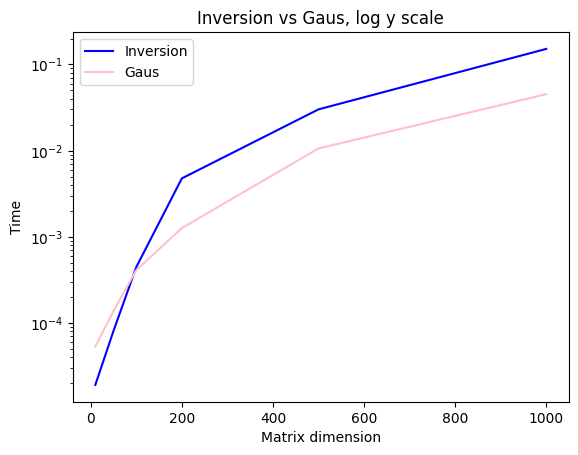

In [55]:
import numpy as np
import scipy.linalg as sla
import matplotlib.pyplot as plt


def inv(A, B):
    AI = sla.inv(A)
    X = AI @ B
    return X

def gaus(A, B):
    X = sla.solve(A, B)
    return X


lib_times = []
my_times = []
dimensions = [10, 50, 100, 200, 500, 1000]

for dim in dimensions:
    A = np.random.rand(dim, dim)
    B = np.random.rand(dim, 10)
    res_lib = %timeit -o inv(A, B)
    lib_times.append(res_lib.best)
    res_my = %timeit -o gaus(A, B)
    my_times.append(res_my.best)

plt.semilogy(dimensions, lib_times, color='blue', label='Inversion')
plt.semilogy(dimensions, my_times, color='pink', label='Gaus')
plt.title('Inversion vs Gaus, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

The slowest run took 5.81 times longer than the fastest. This could mean that an intermediate result is being cached.
857 µs ± 727 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
374 µs ± 8.84 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
The slowest run took 9.56 times longer than the fastest. This could mean that an intermediate result is being cached.
3.95 ms ± 2.63 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
The slowest run took 4.51 times longer than the fastest. This could mean that an intermediate result is being cached.
949 µs ± 641 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
4.99 ms ± 1.38 ms per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.28 ms ± 76 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.7 ms ± 1.99 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.15 ms ± 118 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
The slowest run took 4.33 times longer than the fastest. This could mean th

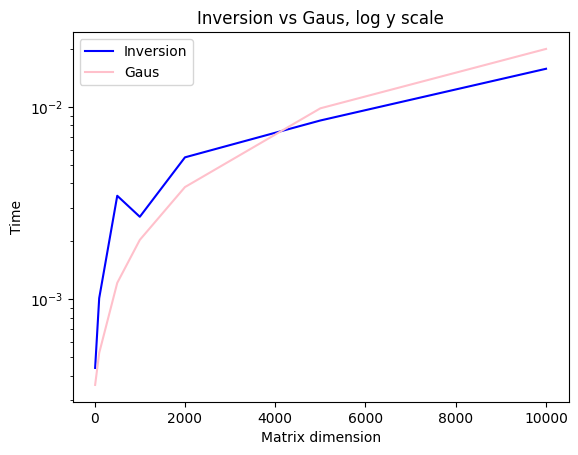

In [54]:
import numpy as np
import scipy.linalg as sla
import matplotlib.pyplot as plt


def inv(A, B):
    AI = sla.inv(A)
    X = AI @ B
    return X

def gaus(A, B):
    X = sla.solve(A, B)
    return X


lib_times = []
my_times = []
dimensions = [10, 100, 500, 1000, 2000, 5000, 10000]

for dim in dimensions:
    A = np.random.rand(100, 100)
    B = np.random.rand(100, dim)
    res_lib = %timeit -o inv(A, B)
    lib_times.append(res_lib.best)
    res_my = %timeit -o gaus(A, B)
    my_times.append(res_my.best)

plt.semilogy(dimensions, lib_times, color='blue', label='Inversion')
plt.semilogy(dimensions, my_times, color='pink', label='Gaus')
plt.title('Inversion vs Gaus, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()